In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
# Load in json
gdf = gpd.read_file("C:/Users/mford.MSBIOWORKS/Project_1/gz_2010_us_040_00_5m.json")
# gdf = gpd.read_file("C:/Users/mford.MSBIOWORKS/Project_1/rewound-geojson.json")

# print(monthly_energy_production_df)
gdf.head(5)

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


In [4]:
row_count = len(gdf)
print("Number of rows in the DataFrame:", row_count)

Number of rows in the DataFrame: 52


In [5]:
unique_states = gdf['NAME'].unique()
print(unique_states)

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Puerto Rico']


In [6]:
value_to_delete = ['Alaska','Hawaii', 'Puerto Rico' ]
gdf = gdf[~gdf['NAME'].isin(value_to_delete)]

In [7]:
gdf.sort_values(by='NAME', ascending=True, inplace = True)
gdf.reset_index(drop=True, inplace=True)
gdf.head(5)

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
2,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
3,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."
4,0400000US08,08,Colorado,,103641.888,"POLYGON ((-106.19055 40.99761, -106.06118 40.9..."


In [8]:
unique_states = gdf['NAME'].unique()
print(unique_states)

['Alabama' 'Arizona' 'Arkansas' 'California' 'Colorado' 'Connecticut'
 'Delaware' 'District of Columbia' 'Florida' 'Georgia' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


In [9]:
row_count = len(gdf)
print("Number of rows in the DataFrame:", row_count)

Number of rows in the DataFrame: 49


In [10]:
gdf.head(5)

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
2,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
3,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."
4,0400000US08,08,Colorado,,103641.888,"POLYGON ((-106.19055 40.99761, -106.06118 40.9..."


In [11]:
df = pd.read_csv("C:/Users/mford.MSBIOWORKS/Project_1/state_counts.csv")
# print(monthly_energy_production_df)
df.head(5)

,STATE,Count
0,Texas,18322
1,Iowa,6284
2,Oklahoma,5344
3,Kansas,3927
4,California,3857


In [12]:
# df.sort_values(by='State', ascending=True, inplace = True)
# df.head(5)

In [13]:
row_count = len(df)
print("Number of rows in the DataFrame:", row_count)


Number of rows in the DataFrame: 43


In [14]:
unique_states = df['STATE'].unique()
print(unique_states)


['Texas' 'Iowa' 'Oklahoma' 'Kansas' 'California' 'Illinois' 'Colorado'
 'Minnesota' 'Oregon' 'North Dakota' 'New Mexico' 'Washington' 'Michigan'
 'Indiana' 'Nebraska' 'Wyoming' 'South Dakota' 'New York' 'Missouri'
 'Montana' 'Pennsylvania' 'Idaho' 'Ohio' 'Wisconsin' 'West Virginia'
 'Maine' 'Arizona' 'Utah' 'Hawaii' 'Alaska' 'North Carolina'
 'Massachusetts' 'New Hampshire' 'Maryland' 'Vermont' 'Nevada'
 'Puerto Rico' 'Rhode Island' 'Tennessee' 'New Jersey' 'Connecticut'
 'Arkansas' 'Delaware']


In [15]:

# Get unique values in the "STATE" column of df1
unique_states_gdf = set(gdf['NAME'].unique())

# Get unique values in the "state" column of df2
unique_states_df = set(df['STATE'].unique())

# Find the unique values in df1 that are not in df2
unique_states_in_gdf = unique_states_gdf - unique_states_df

# Find the unique values in df2 that are not in df1
unique_states_in_df = unique_states_df - unique_states_gdf

# Print the unique values in each DataFrame
print("Unique states in df1 but not in df2:")
print(unique_states_in_gdf)

print("Unique states in df2 but not in df1:")
print(unique_states_in_df)

Unique states in df1 but not in df2:
{'Mississippi', 'Florida', 'Louisiana', 'District of Columbia', 'Georgia', 'South Carolina', 'Alabama', 'Kentucky', 'Virginia'}
Unique states in df2 but not in df1:
{'Puerto Rico', 'Alaska', 'Hawaii'}


In [16]:
value_to_delete_2 = ['Alaska', 'Hawaii','Puerto Rico']
df = df[~df['STATE'].isin(value_to_delete_2)]

In [17]:
df

,STATE,Count
0,Texas,18322
1,Iowa,6284
2,Oklahoma,5344
3,Kansas,3927
4,California,3857
5,Illinois,3557
6,Colorado,2825
7,Minnesota,2700
8,Oregon,2113
9,North Dakota,2086


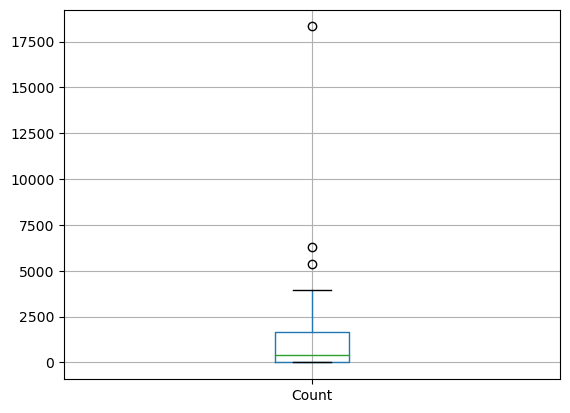

In [31]:
# # create a box plot
# df.boxplot(column=['Count'])

# # display the plot
# plt.show()

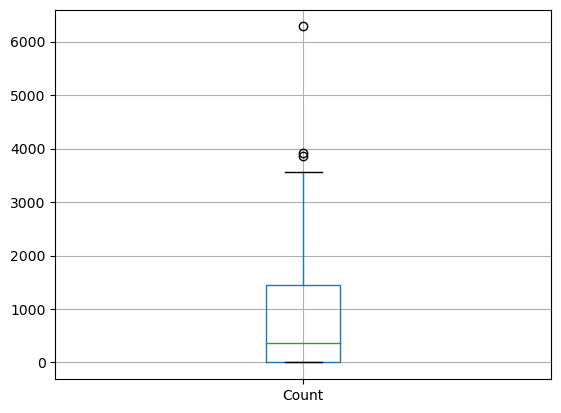

In [32]:

# df = df.drop([41, 12, 34])

# # create a box plot
# df.boxplot(column=['Count'])

# # display the plot
# plt.show()




In [20]:
# Get unique values in the "STATE" column of df1
unique_states_gdf = set(gdf['NAME'].unique())

# Get unique values in the "state" column of df2
unique_states_df = set(df['STATE'].unique())

# Find the unique values in df1 that are not in df2
unique_states_in_gdf = unique_states_gdf - unique_states_df

# Find the unique values in df2 that are not in df1
unique_states_in_df = unique_states_df - unique_states_gdf

# Print the unique values in each DataFrame
print("Unique states in df1 but not in df2:")
print(unique_states_in_gdf)

print("Unique states in df2 but not in df1:")
print(unique_states_in_df)

Unique states in df1 but not in df2:
{'Mississippi', 'Florida', 'Louisiana', 'District of Columbia', 'Georgia', 'South Carolina', 'Alabama', 'Kentucky', 'Virginia'}
Unique states in df2 but not in df1:
set()


In [21]:
print(df.columns)

Index(['STATE', 'Count'], dtype='object')


In [22]:
new_rows = [
    {'STATE': 'Virginia', 'Count': 0},
    {'STATE': 'South Carolina', 'Count': 0},
    {'STATE': 'Florida', 'Count': 0},
    {'STATE': 'Mississippi', 'Count': 0},
    {'STATE': 'Louisiana', 'Count': 0},
    {'STATE': 'District of Columbia', 'Count': 0},
    {'STATE': 'Kentucky', 'Count': 0},
    {'STATE': 'Alabama', 'Count': 0},
    {'STATE': 'Georgia', 'Count': 0},
]

# # Convert the list of dictionaries to a DataFrame
# new_rows_df = pd.DataFrame(new_rows)

# Append the new rows DataFrame to the original DataFrame 'df'
df = df._append(new_rows, ignore_index=False)
df.head(5)

,STATE,Count
0,Texas,18322
1,Iowa,6284
2,Oklahoma,5344
3,Kansas,3927
4,California,3857


In [23]:
row_count = len(df)
print("Number of rows in the DataFrame:", row_count)
df.head(5)

Number of rows in the DataFrame: 49


,STATE,Count
0,Texas,18322
1,Iowa,6284
2,Oklahoma,5344
3,Kansas,3927
4,California,3857


In [24]:
df.sort_values(by='STATE', ascending=True, inplace = True)
df.head(5)

,STATE,Count
7,Alabama,0
26,Arizona,324
41,Arkansas,1
4,California,3857
6,Colorado,2825


In [25]:
df.reset_index(drop=True, inplace=True)
df.head(5)

,STATE,Count
0,Alabama,0
1,Arizona,324
2,Arkansas,1
3,California,3857
4,Colorado,2825


In [26]:
# Merge the GeoDataFrame with your data based on a common column (e.g., 'State' column)
merged_data = gdf.merge(df, left_on='NAME', right_on='STATE', how='left')


In [27]:
row_count = len(merged_data)
print("Number of rows in the DataFrame:", row_count)

Number of rows in the DataFrame: 49


In [28]:
# data_types = dfClusterMap.dtypes
# print(data_types)

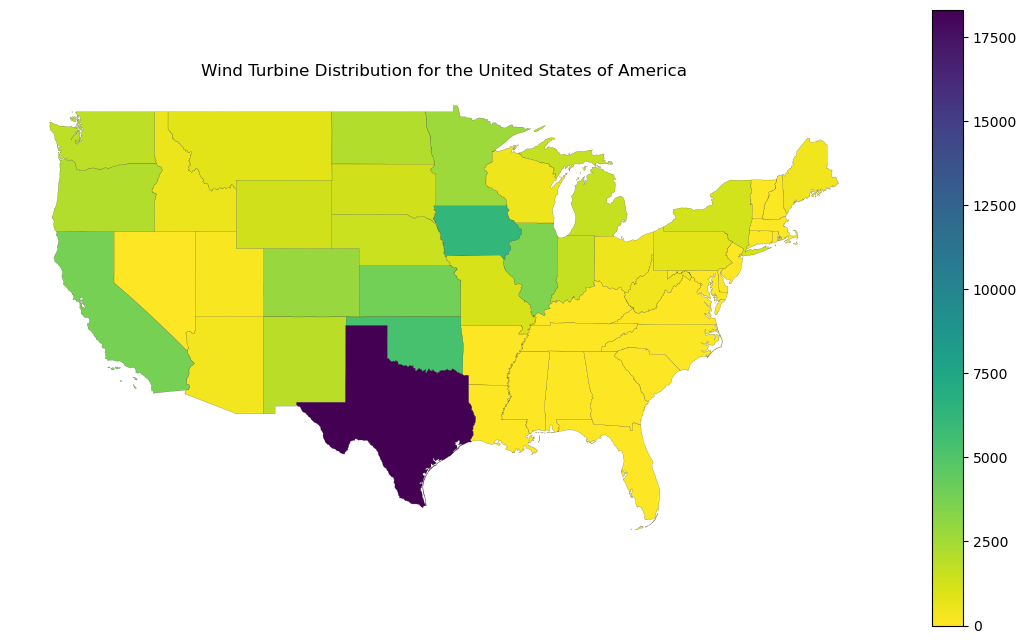

In [30]:
# merged_data = merged_data.to_crs(epsg=3395)

fig, ax = plt.subplots(1, 1, figsize=(14, 8))

merged_data.plot(column='Count', cmap='viridis_r', linewidth=0.1, ax=ax, edgecolor='black', legend=True)

ax.set_axis_off()
 
plt.title('Wind Turbine Distribution for the United States of America')

plt.show()

